In [ ]:
import torch 
from transformers import GPT2LMHeadModel

model=GPT2LMHeadModel.from_pretrained('gpt2')#这个只有124m，实际GPT2XL有1558m参数
sd=model.state_dict()

for k,v in sd.items():
    print(k,v.shape)




Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [5]:
sd['transformer.wpe.weight'].view(-1)[:20]
#print(sd['transformer.wpe.weight'].view(-1).shape)

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

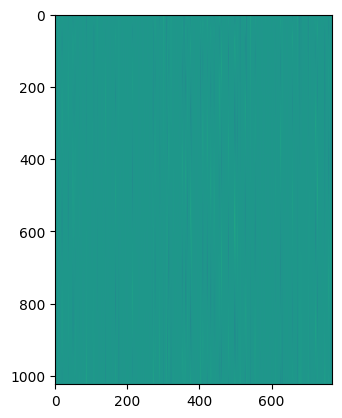

In [6]:
import matplotlib.pyplot as plt
plt.imshow(sd['transformer.wpe.weight'])

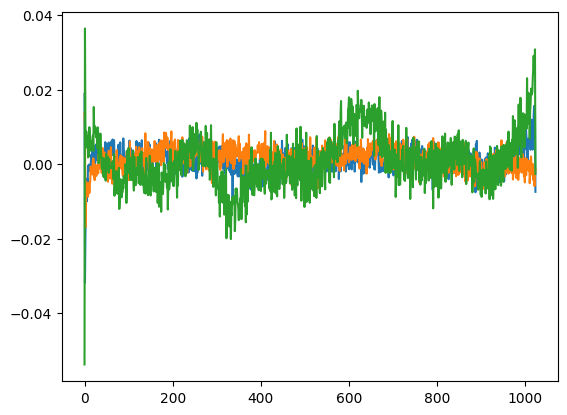

In [9]:
plt.plot(sd['transformer.wpe.weight'][:,50])
plt.plot(sd['transformer.wpe.weight'][:,100])
plt.plot(sd['transformer.wpe.weight'][:,200])

In [14]:
from transformers import pipeline,set_seed
generator=pipeline('text-generation',model='gpt2')
set_seed(42)
generator('Hello, I am a student',max_length=30,num_return_sequences=3)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Hello, I am a student for the University of Michigan. I have been a student since 1984, and have been studying at Michigan for the past 10 years.\n\nI have been working in the department of Economics for 3 years. I have been doing research for the last 5 years and am currently working on a project that will study the economic effects of unemployment.\n\nI am currently at the University of Illinois, in the Economics department.\n\nI am currently working on a project that will study the economic effects of unemployment.\n\nI have been working as a student for the last 3 years at the University of Michigan. I am currently studying at Michigan for the past 10 years. I am also a student at Ohio State University.\n\nI am currently at the University of Michigan.\n\nI am currently at the University of Michigan.\n\nI am currently at the University of Michigan.\n\nI am currently at the University of Michigan.\n\nI am currently at the University of Michigan.\n\nI am currently